## Лаборатоная работа №1

Фамилия: Булатов 
    
Имя: Айдар
    
Отчество: Салаватович
    
ВУЗ: МГУ
    
Факультет: мехмат
    
Курс: 5
    
Кафедра: механики композитов
    
Научный руководитель: П.Н.Демидович

### Введение в Keras

Цели лабораторной работы: 
- разобраться с интерфейсом слоёв, участвующих в построении нейронной сети
- научиться обучать нейронные сети

In [3]:
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, Conv1D
from keras.utils import np_utils
from keras.datasets import mnist
 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

print(keras.__version__)
print(tf.__version__)

2.2.4
1.14.0


#### Подготовка данных

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


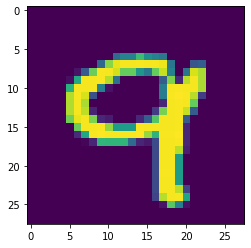

1.0 0.0 float32
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

index = 14888
plt.imshow(X_train[index,0, :,:])
plt.show()

print(np.max(X_train[index,0, :,:]), np.min(X_train[index,0, :,:]), np.dtype(np.max(X_train[index,0, :,:])))
print(Y_train[index])
print(np.argmax(Y_train[index]))

#### 1. (1 балл) Обучите простейшую однослойную нейронную сеть. Какой максимальный результат на тесте вам удалось достичь? Параметры обучения можно менять

In [6]:
# from sklearn.model_selection import ParameterGrid as PG

#
# params = PG({'validation_split': val_splits, 'batch_size': batch_sizes})

### ваша точность на тесте 
## 0.9272


In [10]:
# код, на котором достигается эта точность
input_image = Input(shape=(1, 28, 28))
flatten = Flatten()(input_image)
dense2 = Dense(10, activation='softmax')(flatten)
model = Model(inputs=input_image, outputs=dense2)

#код обучения разрешается исправлять
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.05, batch_size=20, nb_epoch=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score[1])

/home/ayd98/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 13s 236us/step - loss: 0.4533 - acc: 0.8792 - val_loss: 0.2586 - val_acc: 0.9278
Epoch 2/10
54000/54000 [==============================] - 7s 122us/step - loss: 0.3045 - acc: 0.9147 - val_loss: 0.2457 - val_acc: 0.9333
Epoch 3/10
54000/54000 [==============================] - 10s 179us/step - loss: 0.2850 - acc: 0.9203 - val_loss: 0.2347 - val_acc: 0.9353
Epoch 4/10
54000/54000 [==============================] - 17s 311us/step - loss: 0.2764 - acc: 0.9227 - val_loss: 0.2306 - val_acc: 0.9353
Epoch 5/10
54000/54000 [==============================] - 12s 215us/step - loss: 0.2697 - acc: 0.9244 - val_loss: 0.2283 - val_acc: 0.9388
Epoch 6/10
54000/54000 [==============================] - 8s 146us/step - loss: 0.2654 - acc: 0.9259 - val_loss: 0.2257 - val_acc: 0.9372
Epoch 7/10
54000/54000 [==============================] - 8s 154us/step - loss: 0.2617 - acc: 0.9277 - val_loss: 0.2226

### поиск оптимальных параметров:

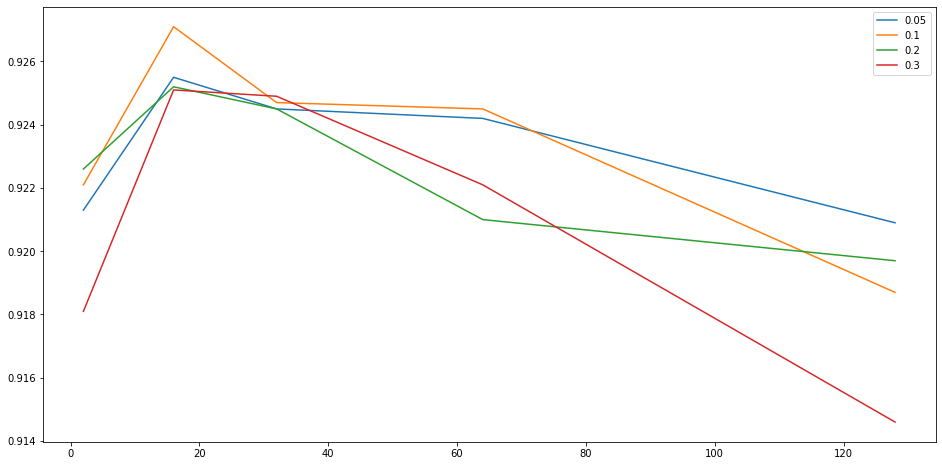

In [40]:
val_splits = [0.05, 0.1, 0.2, 0.3]
batch_sizes = [2, 16, 32, 64, 128]


input_image = Input(shape=(1, 28, 28))
flatten = Flatten()(input_image)

accs = []
for validation_split in val_splits:
    acc_split = []
    for batch_size in batch_sizes:
        dense2 = Dense(10, activation='softmax')(flatten)
        model = Model(inputs=input_image, outputs=dense2)

        model.compile(loss='categorical_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model.fit(X_train, Y_train, validation_split=validation_split, batch_size=batch_size, epochs=4, verbose=0)
        score = model.evaluate(X_test, Y_test, verbose=0)

        acc_split.append(score[1])
    
    accs.append(acc_split)
    
plt.figure(figsize = (16,8))
for acc in accs:
    plt.plot(batch_sizes, acc)
    
plt.gca().legend(val_splits)
plt.show()

#### 2. (2 балла) Обучите двуслойную полносвязную сеть. Какой максимальный результат на тесте вам удалось достичь?

### ваша точность на тесте 
## 0.9763

In [12]:
adam = keras.optimizers.Adam()

model = Sequential()
model.add(Flatten())
model.add(Dense(100, input_shape=(1, 28,28), activation='tanh'))
# model.add(Dropout(0.2))

model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.fit(X_train, Y_train, validation_split=0.05, batch_size=20, epochs=10, verbose=1)
model.evaluate(X_test, Y_test, verbose=0)

Train on 57000 samples, validate on 3000 samples
Epoch 1/10
57000/57000 [==============================] - 7s 127us/step - loss: 0.2876 - acc: 0.9230 - val_loss: 0.1198 - val_acc: 0.9643
Epoch 2/10
57000/57000 [==============================] - 6s 107us/step - loss: 0.1269 - acc: 0.9630 - val_loss: 0.0835 - val_acc: 0.9780
Epoch 3/10
57000/57000 [==============================] - 6s 107us/step - loss: 0.0889 - acc: 0.9745 - val_loss: 0.0687 - val_acc: 0.9823
Epoch 4/10
57000/57000 [==============================] - 6s 108us/step - loss: 0.0676 - acc: 0.9806 - val_loss: 0.0701 - val_acc: 0.9800
Epoch 5/10
57000/57000 [==============================] - 6s 111us/step - loss: 0.0528 - acc: 0.9851 - val_loss: 0.0666 - val_acc: 0.9810
Epoch 6/10
57000/57000 [==============================] - 6s 112us/step - loss: 0.0428 - acc: 0.9882 - val_loss: 0.0658 - val_acc: 0.9793
Epoch 7/10
57000/57000 [==============================] - 7s 116us/step - loss: 0.0344 - acc: 0.9905 - val_loss: 0.0672 - v

#### 3. (2 балла) Обучите трёхслойную полносвязную сеть. Какой максимальный результат на тесте вам удалось достичь?

### ваша точность на тесте 
## 0.9798

In [24]:
adam = keras.optimizers.Adam(lr=0.001)

model = Sequential()
model.add(Flatten())
model.add(Dense(200, input_shape=(1, 28,28), activation='tanh'))
model.add(Dense(170, activation='tanh'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.fit(X_train, Y_train, validation_split=0.05, batch_size=20, epochs=12, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
score

Train on 57000 samples, validate on 3000 samples
Epoch 1/12
57000/57000 [==============================] - 13s 237us/step - loss: 0.2342 - acc: 0.9317 - val_loss: 0.1002 - val_acc: 0.9703
Epoch 2/12
57000/57000 [==============================] - 12s 208us/step - loss: 0.1024 - acc: 0.9690 - val_loss: 0.0729 - val_acc: 0.9803
Epoch 3/12
57000/57000 [==============================] - 12s 209us/step - loss: 0.0703 - acc: 0.9787 - val_loss: 0.0825 - val_acc: 0.9753
Epoch 4/12
57000/57000 [==============================] - 12s 212us/step - loss: 0.0519 - acc: 0.9834 - val_loss: 0.0790 - val_acc: 0.9773
Epoch 5/12
57000/57000 [==============================] - 12s 212us/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.0712 - val_acc: 0.9767
Epoch 6/12
57000/57000 [==============================] - 12s 213us/step - loss: 0.0322 - acc: 0.9894 - val_loss: 0.0764 - val_acc: 0.9787
Epoch 7/12
57000/57000 [==============================] - 12s 211us/step - loss: 0.0275 - acc: 0.9913 - val_loss: 0.0

[0.08424683785605011, 0.9798]

#### 4. (3 балла) Улучшится ли ваш результат, есть в сеть добавить слои нормализации (dropout, batchnorm  и др.)?

### ваш ответ
## 0.9815

In [126]:
adam = keras.optimizers.Adam(lr=0.001)

model = Sequential()
model.add(Flatten())
model.add(Dense(240, input_shape=(1, 28,28), activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(120, activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.fit(X_train, Y_train, validation_split=0.2, batch_size=30, epochs=15, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
score

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 22s 461us/step - loss: 0.5225 - acc: 0.8621 - val_loss: 0.1738 - val_acc: 0.9476
Epoch 2/15
48000/48000 [==============================] - 16s 331us/step - loss: 0.2131 - acc: 0.9343 - val_loss: 0.1186 - val_acc: 0.9649
Epoch 3/15
48000/48000 [==============================] - 16s 331us/step - loss: 0.1698 - acc: 0.9492 - val_loss: 0.1100 - val_acc: 0.9662
Epoch 4/15
48000/48000 [==============================] - 16s 324us/step - loss: 0.1396 - acc: 0.9561 - val_loss: 0.0939 - val_acc: 0.9712
Epoch 5/15
48000/48000 [==============================] - 16s 336us/step - loss: 0.1236 - acc: 0.9611 - val_loss: 0.1003 - val_acc: 0.9713
Epoch 6/15
48000/48000 [==============================] - 16s 327us/step - loss: 0.1129 - acc: 0.9651 - val_loss: 0.0971 - val_acc: 0.9713
Epoch 7/15
48000/48000 [==============================] - 15s 316us/step - loss: 0.1037 - acc: 0.9679 - val_loss: 0.

[0.06496458664224483, 0.9815]

#### 5. (4 баллов) Обучите полносвязную нейронную сеть (без свёрточных слоёв), достигающую лучшего качества на тесте без ограничений на количество слоёв?

### ваша точность на тесте 
## 0.9807

In [26]:
adam = keras.optimizers.Adam(lr=0.001)

model = Sequential()
model.add(Flatten())
model.add(Dense(240, input_shape=(1, 28,28), activation='sigmoid'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(120, activation='sigmoid'))
model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(Dense(60, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.fit(X_train, Y_train, validation_split=0.05, batch_size=30, epochs=12, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
score

Train on 57000 samples, validate on 3000 samples
Epoch 1/12
57000/57000 [==============================] - 17s 301us/step - loss: 0.6416 - acc: 0.8295 - val_loss: 0.1158 - val_acc: 0.9670
Epoch 2/12
57000/57000 [==============================] - 15s 255us/step - loss: 0.2280 - acc: 0.9327 - val_loss: 0.0883 - val_acc: 0.9740
Epoch 3/12
57000/57000 [==============================] - 14s 252us/step - loss: 0.1734 - acc: 0.9486 - val_loss: 0.0804 - val_acc: 0.9780
Epoch 4/12
57000/57000 [==============================] - 15s 254us/step - loss: 0.1445 - acc: 0.9572 - val_loss: 0.0686 - val_acc: 0.9800
Epoch 5/12
57000/57000 [==============================] - 15s 256us/step - loss: 0.1263 - acc: 0.9633 - val_loss: 0.0686 - val_acc: 0.9803
Epoch 6/12
57000/57000 [==============================] - 15s 256us/step - loss: 0.1132 - acc: 0.9669 - val_loss: 0.0647 - val_acc: 0.9820
Epoch 7/12
57000/57000 [==============================] - 15s 257us/step - loss: 0.0996 - acc: 0.9702 - val_loss: 0.0

[0.06666403451259248, 0.9807]

In [28]:
# adam = keras.optimizers.Adam(lr=0.001)

# model = Sequential()
# model.add(Flatten())
# model.add(Dense(128, input_shape=(1, 28,28), activation='tanh'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(Dense(128, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(128, activation='tanh'))
# model.add(Dropout(0.2))
# # model.add(BatchNormalization())
# model.add(Dense(60, activation='tanh'))
# model.add(Dropout(0.2))
# # model.add(BatchNormalization())
# model.add(Dense(10, activation='sigmoid'))

# model.compile(loss='categorical_crossentropy',
#               optimizer=adam,
#               metrics=['accuracy'])

# model.fit(X_train, Y_train, validation_split=0.05, batch_size=20, epochs=12, verbose=1)
# score = model.evaluate(X_test, Y_test, verbose=0)
# score

Train on 57000 samples, validate on 3000 samples
Epoch 1/12
57000/57000 [==============================] - 20s 347us/step - loss: 0.4828 - acc: 0.8689 - val_loss: 0.1340 - val_acc: 0.9630
Epoch 2/12
57000/57000 [==============================] - 17s 300us/step - loss: 0.2694 - acc: 0.9242 - val_loss: 0.1152 - val_acc: 0.9717
Epoch 3/12
57000/57000 [==============================] - 17s 298us/step - loss: 0.2240 - acc: 0.9374 - val_loss: 0.1034 - val_acc: 0.9730
Epoch 4/12
57000/57000 [==============================] - 17s 306us/step - loss: 0.2017 - acc: 0.9420 - val_loss: 0.0931 - val_acc: 0.9747
Epoch 5/12
57000/57000 [==============================] - 18s 309us/step - loss: 0.1831 - acc: 0.9489 - val_loss: 0.0745 - val_acc: 0.9797
Epoch 6/12
57000/57000 [==============================] - 18s 309us/step - loss: 0.1701 - acc: 0.9522 - val_loss: 0.0806 - val_acc: 0.9807
Epoch 7/12
57000/57000 [==============================] - 19s 328us/step - loss: 0.1631 - acc: 0.9537 - val_loss: 0.0

[0.0998072920974344, 0.9733]

#### 6. (3 баллов) Обучите  нейронную сеть с  одним свёрточным слоем,  достигающую лучшего качества на тесте без ограничений на общее количество слоёв? Слой субдискретизации можно использовать в неограниченном количестве.

### ваша точность на тесте 
## 0.9867

In [211]:
Momentum = keras.optimizers.SGD(momentum=0.9, nesterov=False)

model = Sequential()

model.add(Conv2D(input_shape=(1, 28, 28), data_format='channels_first',
                 kernel_size = (3,3), filters = 64, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=Momentum,
              metrics=['accuracy'])

model.fit(X_train, Y_train, validation_split=0.1, batch_size=50, epochs=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
score

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 70s 1ms/step - loss: 0.3938 - acc: 0.8873 - val_loss: 0.1469 - val_acc: 0.9577
Epoch 2/10
54000/54000 [==============================] - 63s 1ms/step - loss: 0.1803 - acc: 0.9463 - val_loss: 0.0981 - val_acc: 0.9715
Epoch 3/10
54000/54000 [==============================] - 61s 1ms/step - loss: 0.1111 - acc: 0.9672 - val_loss: 0.0664 - val_acc: 0.9815
Epoch 4/10
54000/54000 [==============================] - 62s 1ms/step - loss: 0.0804 - acc: 0.9755 - val_loss: 0.0590 - val_acc: 0.9835
Epoch 5/10
54000/54000 [==============================] - 61s 1ms/step - loss: 0.0655 - acc: 0.9799 - val_loss: 0.0500 - val_acc: 0.9872
Epoch 6/10
54000/54000 [==============================] - 63s 1ms/step - loss: 0.0566 - acc: 0.9826 - val_loss: 0.0517 - val_acc: 0.9860
Epoch 7/10
54000/54000 [==============================] - 62s 1ms/step - loss: 0.0476 - acc: 0.9855 - val_loss: 0.0445 - val_acc:

[0.038688818417559376, 0.9867]

#### 7. (5 баллов) Обучите лучшую нейронную сеть следующими оптимизаторами: SGD, SGD + Momentum, SGD + NAG, AdaGrad, Adadelta, RMSprop, Adam. Какой оптимизатор позволяет достигнуть наибольшего качества на тесте? Какой оптимизатор сходится быстрее?

In [32]:
SGD = keras.optimizers.SGD(nesterov=False)
Momentum = keras.optimizers.SGD(momentum=0.9, nesterov=False)
NAG = keras.optimizers.SGD(nesterov=True)
AdaGrad = keras.optimizers.Adagrad()
Adadelta = keras.optimizers.Adadelta()
RMSprop = keras.optimizers.RMSprop()
Adam = keras.optimizers.Adam()   

optimizers = [SGD, Momentum, NAG, AdaGrad, Adadelta, RMSprop, Adam]

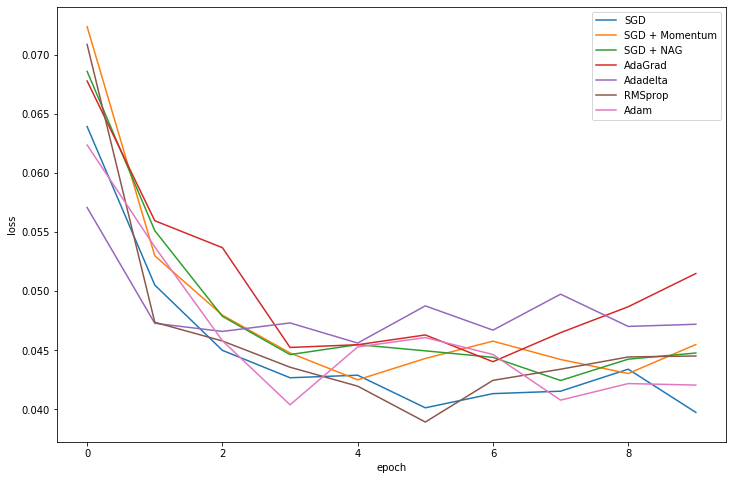

In [34]:
plt.figure(figsize=(12,8))

scores = []
for optim in optimizers:
    
    model = Sequential()
    model.add(Conv2D(input_shape=(1, 28, 28), data_format='channels_first',
                     kernel_size = (3,3), filters = 30, activation='tanh'))
    model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(120, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=adam,
                  metrics=['accuracy'])

    history = model.fit(X_train, Y_train, validation_split=0.1, batch_size=128, epochs=10, verbose=0)
    plt.plot(history.history['val_loss'])
    score = model.evaluate(X_test, Y_test, verbose=0)
    scores.append(score)
    
plt.gca().legend(['SGD', 'SGD + Momentum', 'SGD + NAG', 'AdaGrad', 'Adadelta', 'RMSprop', 'Adam'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### видим, что в данном случае быстрее всего сходится RMSprop, однако результаты примерно одинаковы

### лучшая модель дает точность 
## 0.992

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 138s 3ms/step - loss: 0.1967 - acc: 0.9500 - val_loss: 0.0499 - val_acc: 0.9860
Epoch 2/10
54000/54000 [==============================] - 135s 3ms/step - loss: 0.0586 - acc: 0.9842 - val_loss: 0.0503 - val_acc: 0.9853
Epoch 3/10
54000/54000 [==============================] - 135s 3ms/step - loss: 0.0430 - acc: 0.9881 - val_loss: 0.0372 - val_acc: 0.9898
Epoch 4/10
54000/54000 [==============================] - 135s 3ms/step - loss: 0.0337 - acc: 0.9906 - val_loss: 0.0328 - val_acc: 0.9900
Epoch 5/10
54000/54000 [==============================] - 135s 3ms/step - loss: 0.0261 - acc: 0.9927 - val_loss: 0.0341 - val_acc: 0.9902
Epoch 6/10
54000/54000 [==============================] - 136s 3ms/step - loss: 0.0215 - acc: 0.9938 - val_loss: 0.0314 - val_acc: 0.9912
Epoch 7/10
54000/54000 [==============================] - 137s 3ms/step - loss: 0.0187 - acc: 0.9948 - val_loss: 0.0342 - v

[0.02799740214999765, 0.992]

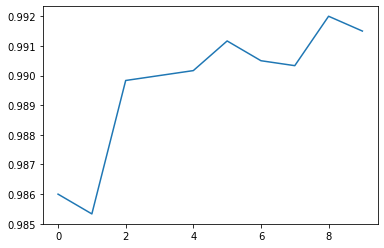

In [39]:
model = Sequential()
model.add(Conv2D(input_shape=(1, 28, 28), data_format='channels_first',
                 kernel_size = (3,3), filters = 64, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(data_format='channels_first',
                 kernel_size = (3,3), filters = 64, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2), data_format='channels_first', padding='valid'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(60, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.1, batch_size=130, epochs=10, verbose=1)
plt.plot(history.history['val_acc'])
score = model.evaluate(X_test, Y_test, verbose=0)
score